<a href="https://colab.research.google.com/github/PatrekurTh/LoL-ML/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glossary

---

* Warding totem: An item that a player can put on the map to reveal the nearby area. Very useful for map/objectives control.
* Minions: NPC that belong to both teams. They give gold when killed by players.
* Jungle minions: NPC that belong to NO TEAM. They give gold and buffs when killed by players.
* Elite monsters: Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team.
* Dragons: Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team.
* Herald: Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures.
* Towers: Structures you have to destroy to reach the enemy Nexus. They give gold.
* Level: Champion level. Start at 1. Max is 18.
* Meta game: blablabla
* Season: blabla

# Step 1: Frame the Problem and Look at the Big Picture

[League of Legends](https://en.wikipedia.org/wiki/League_of_Legends) is a multiplayer online battle arena (MOBA) game that has helped propel esports into mainstream popularity. Developed by Riot Games, it pits two teams of 5 players against each other with the aim of destroying the opponent's base, offering a complex and strategic gaming experience.

Goal: Our main objective is to increase accuracy in prediction of the outcome of matches, given only the match data for the first 10 minutes. We can also draw information from other factors, such as the most rewarding objectives in the first minutes of a match which will reward stakeholders.

Stakeholders: The outcome if successful could benefit Riot Games with game design decisions, aswell as provide strategic insight for the esport teams. It could also, for better or worse, benefit betting platforms, either players in placing bets or the platform in calculating odds.

Performance Measure: We believe accuracy to be the main focus. The higher the better, since the ultimate goal is to predict outcome of games correctly.

There are other models similar to predict sports. However they usually draw conclusions pre-match from the team statistics and match history, whereas we are in the unique position to get a good state of the game at a given time interval.

League of Legends matches last [around 30 minutes](https://www.leagueofgraphs.com/stats/game-durations). The original wait time to initiate a surrender vote was 20 minutes, before adding in the early surrender option of 15 minutes. This gives us a boundary of what the company and players believe is a realistic time to evaluate the match outcome. Usually players measure the outcome based on team kills, structured destroyed and gold a certain role or champion has accumulated.

# Step 2: Get the Data

We will need information about the match's largest impacting factors, such as player and structure kills, team gold as well as objective kills (dragon, herald)

We found a dataset [on Kaggle](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min/code) which has all the major events for the first 10 minutes of around 10.000 matches played in the season. Though the dataset is dated 3 years ago, there have been no such breaking changes to the meta game in that time to make the data completely obsolete. Fresh data is always available from the [Riot Games API](https://developer.riotgames.com/apis) to retrain the model if good results are found, but it was considered too time consuming for now.

Since the data is most likely (tjekka kaggle) fetched from the RIOT API, we assume their [policies](https://developer.riotgames.com/policies/general) apply, thus the focus of this project will be on the analytical side in regards to gameplay optimization and balancing, it is not our intention to benefit any betting platform users.

In [ ]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the data
df = pd.read_csv('/content/high_diamond_ranked_10min.csv')

In [ ]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [ ]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

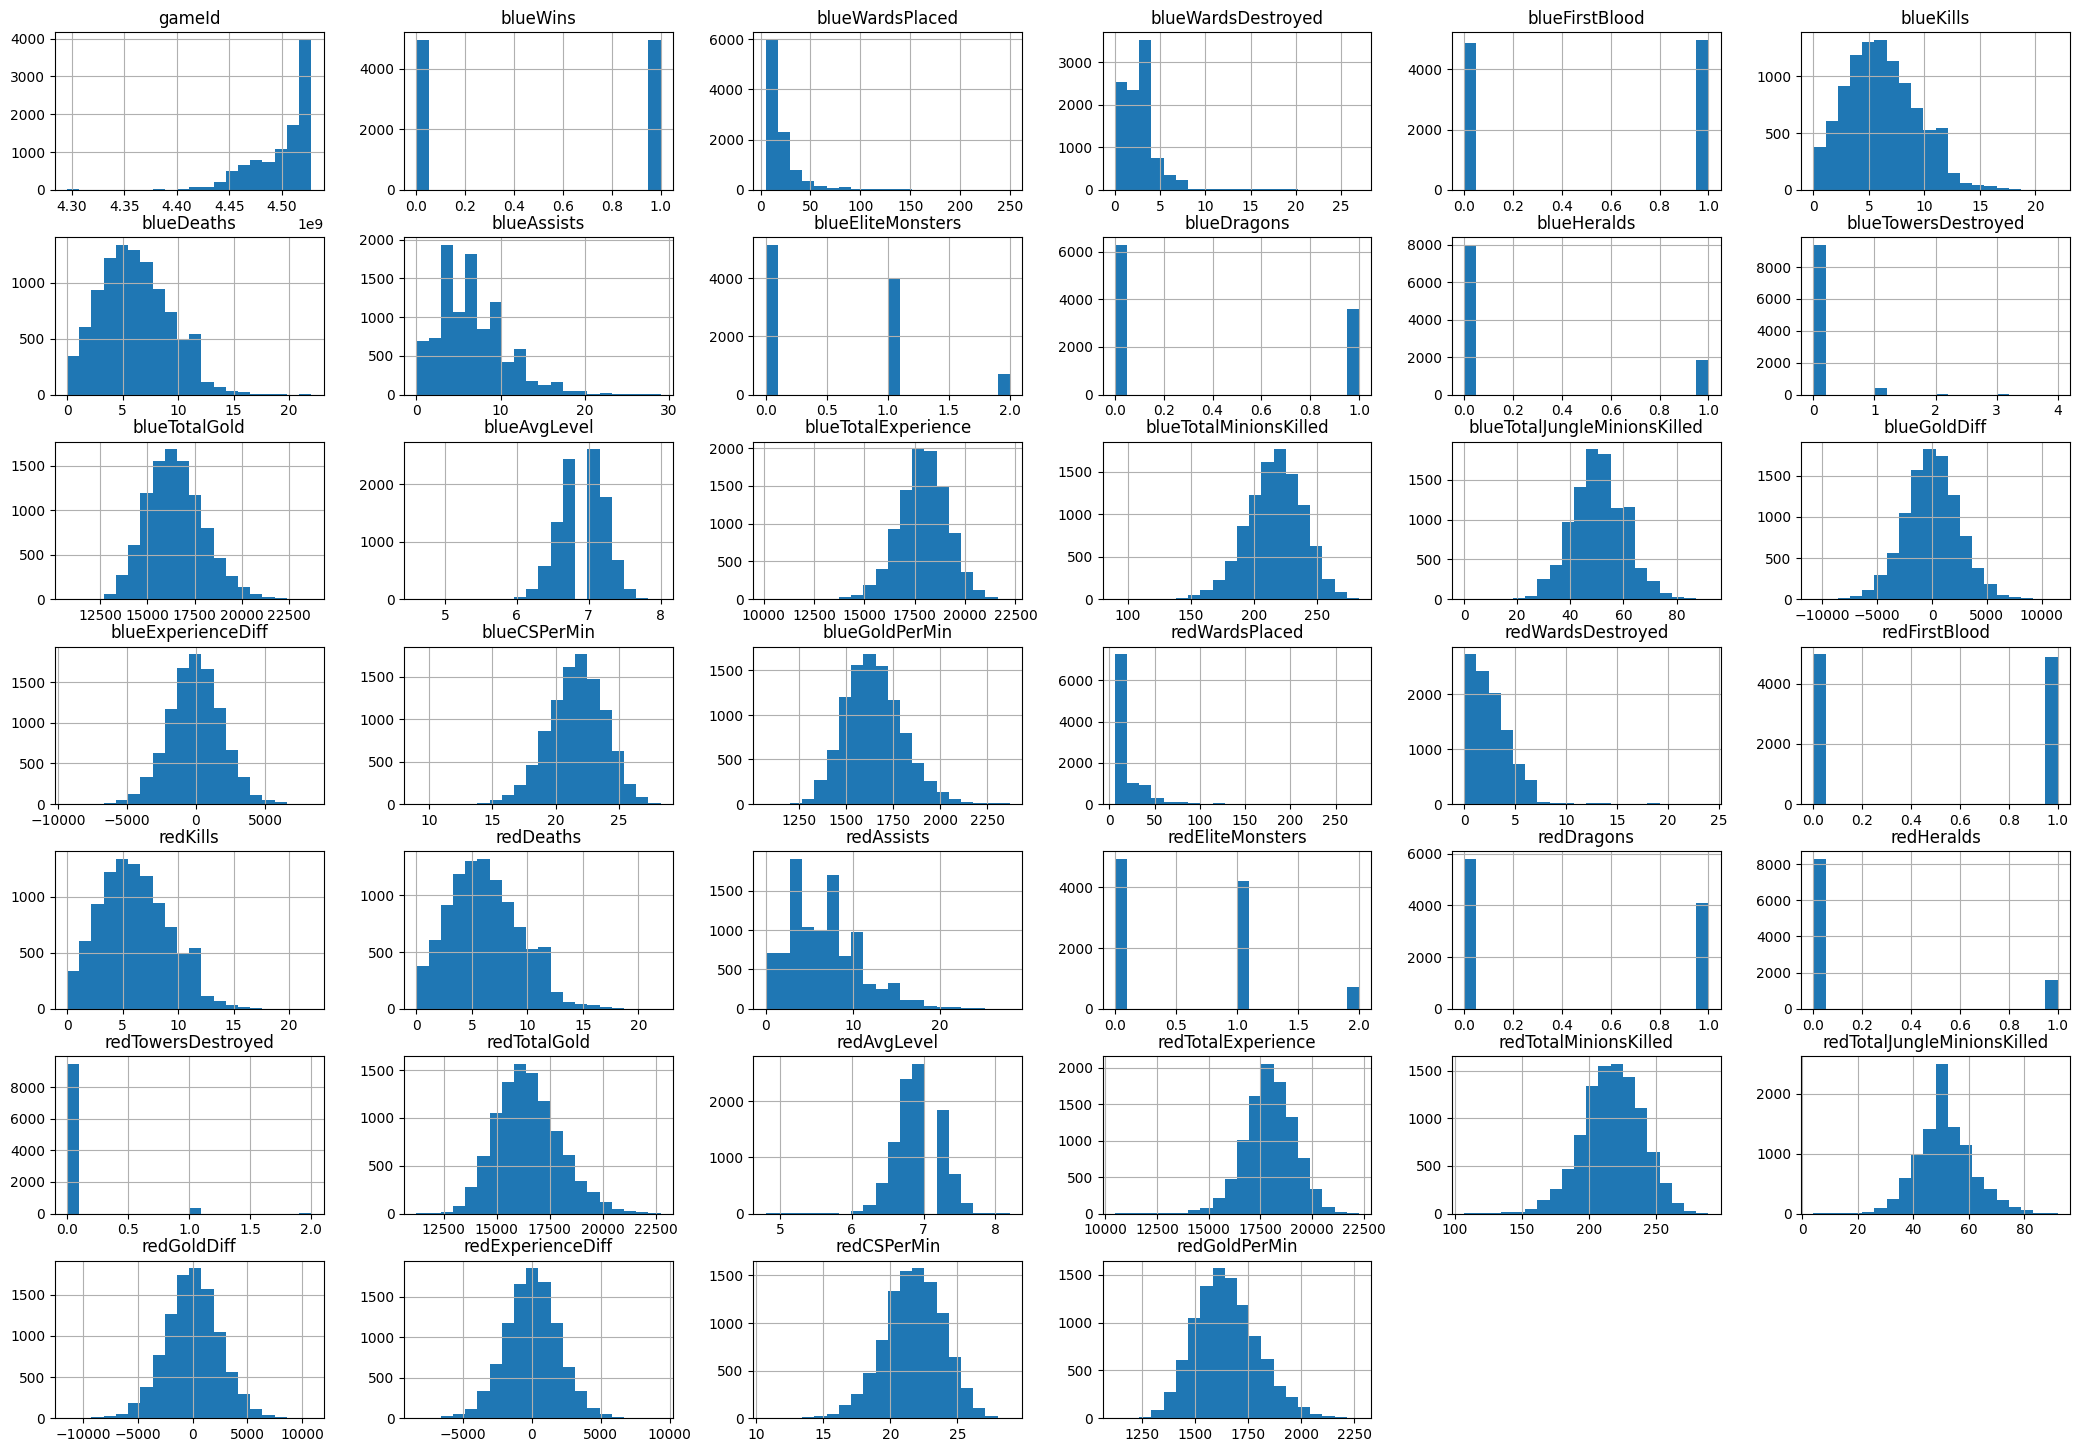

In [ ]:
df.hist(bins=20, figsize=(26,18))
plt.show()

### Notes
 * The Datasets consists of 9879 entries with 40 attributes.
 * The attributes are numerical values only, with no missing values
 * No preprocessing regarding missing or different typed values is necessary.

In [ ]:
# Test Set
from sklearn.model_selection import train_test_split

X, y  = train_test_split(df, test_size=0.2, random_state=42)

We want to make sure the split doesnt favor one side, to prevent the model from predicting the favored side everytime with decent results. By the looks of the graph below the split seems sufficient.

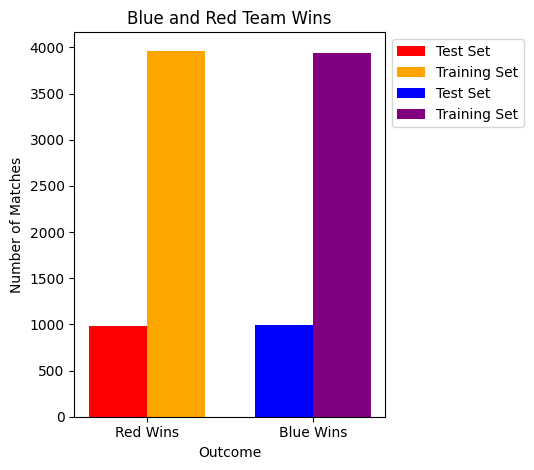

In [ ]:
train_blue_wins = X['blueWins'].value_counts().sort_index()
test_blue_wins = y['blueWins'].value_counts().sort_index()

combined_data = pd.DataFrame({'Test Set': test_blue_wins, 'Training Set': train_blue_wins})

labels = ['Red Wins', 'Blue Wins']
x = np.arange(len(labels))

width = 0.35

fig, ax = plt.subplots()

ax.bar(x[0] - width/2, combined_data.loc[0, 'Test Set'], width, label='Test Set - Red Wins', color='red')
ax.bar(x[0] + width/2, combined_data.loc[0, 'Training Set'], width, label='Training Set - Red Wins', color='orange')

ax.bar(x[1] - width/2, combined_data.loc[1, 'Test Set'], width, label='Test Set - Blue Wins', color='blue')
ax.bar(x[1] + width/2, combined_data.loc[1, 'Training Set'], width, label='Training Set - Blue Wins', color='purple')

ax.set_xlabel('Outcome')
ax.set_ylabel('Number of Matches')
ax.set_title('Blue and Red Team Wins')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(['Test Set', 'Training Set', 'Test Set', 'Training Set'],
          loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

# Step 3: Explore the Data

In [ ]:
# Copy of the training set

X_copy = X.copy()

In [ ]:
corr_matrix = X_copy.corr()

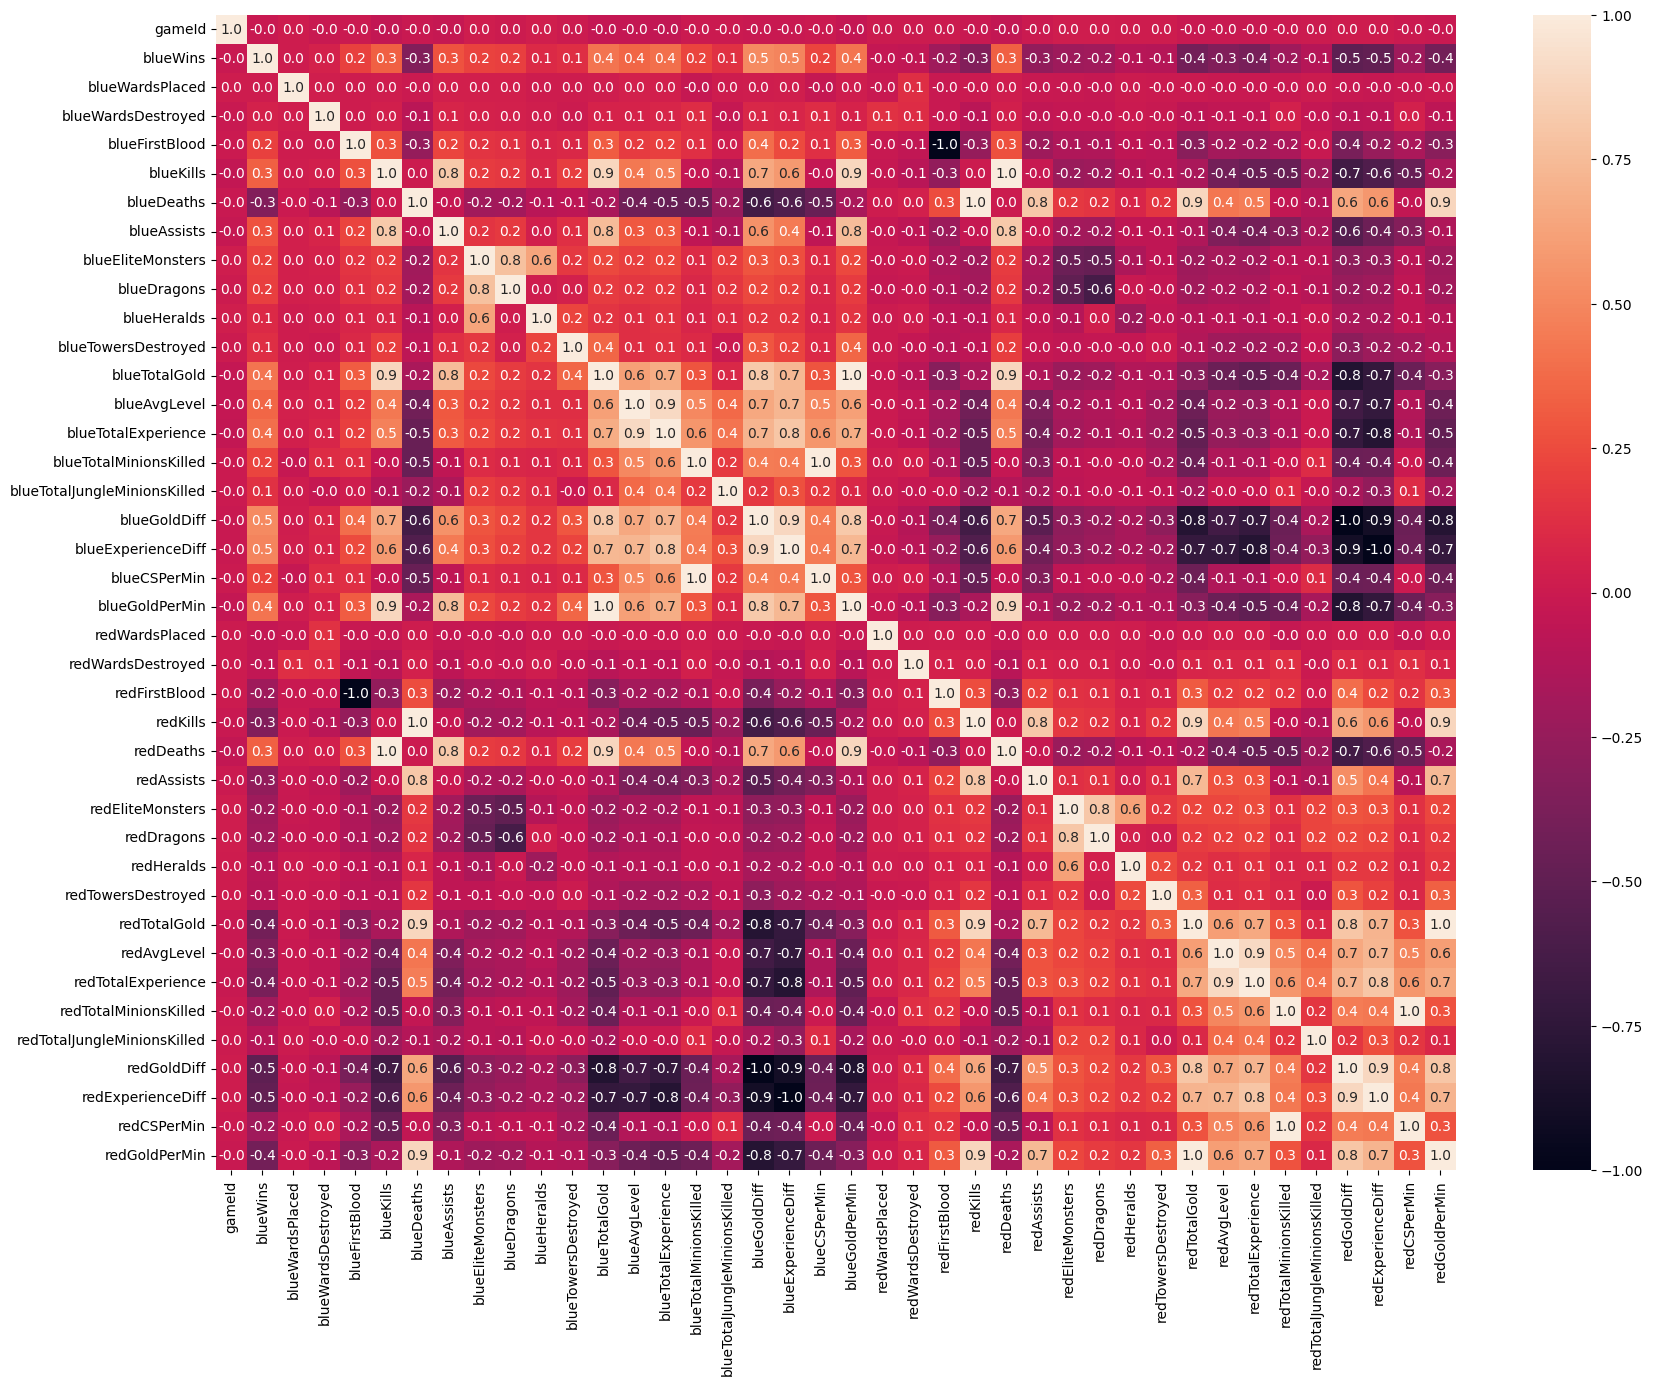

In [ ]:

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f")
plt.show()

We can see high corellation between the per minute (PerMin) attributes and their respective Total, expected and we should remove one of them.

Let's explore further attributes correlate to winning the game (blueWins), which is our target.

In [ ]:
corr_matrix['blueWins'].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.509779
blueExperienceDiff              0.487576
blueGoldPerMin                  0.415749
blueTotalGold                   0.415749
blueTotalExperience             0.393903
blueAvgLevel                    0.355270
blueKills                       0.334459
redDeaths                       0.334459
blueAssists                     0.277824
blueCSPerMin                    0.219877
blueTotalMinionsKilled          0.219877
blueEliteMonsters               0.217683
blueFirstBlood                  0.203871
blueDragons                     0.202598
blueTotalJungleMinionsKilled    0.138697
blueTowersDestroyed             0.121115
blueHeralds                     0.098868
blueWardsDestroyed              0.047221
blueWardsPlaced                 0.008948
gameId                         -0.012000
redWardsPlaced                 -0.031811
redWardsDestroyed              -0.053896
redHeralds                     -0.101002
redTotalJungleMi

Looks like Experience and Gold difference are highly corellated to the victory. From this we can conclude several things:

* gameId is a unique and useless attribute
* One-to-One correlations:
    * Many of the attributes have a duplicated inverse
    * There are some redundant attributes, since in most cases kills for one team is the death for the other, etc
* All of the Red teams progress is negatively corellated which is expected.
* We will have to take a closer look at the GoldDiff and ExperienceDiff attribute, with respect to their contributing factors, highest being:
    * Player kills
    * Structure kills
    * Minion kills
* Both students being players, we were expecting a higher correlation with tower kills, but the correlation matrix indicates that player and minion kills have higher importance in the first 10 minutes. This is expected to change if the game length snapshot would be increased and could be interesting to compare.

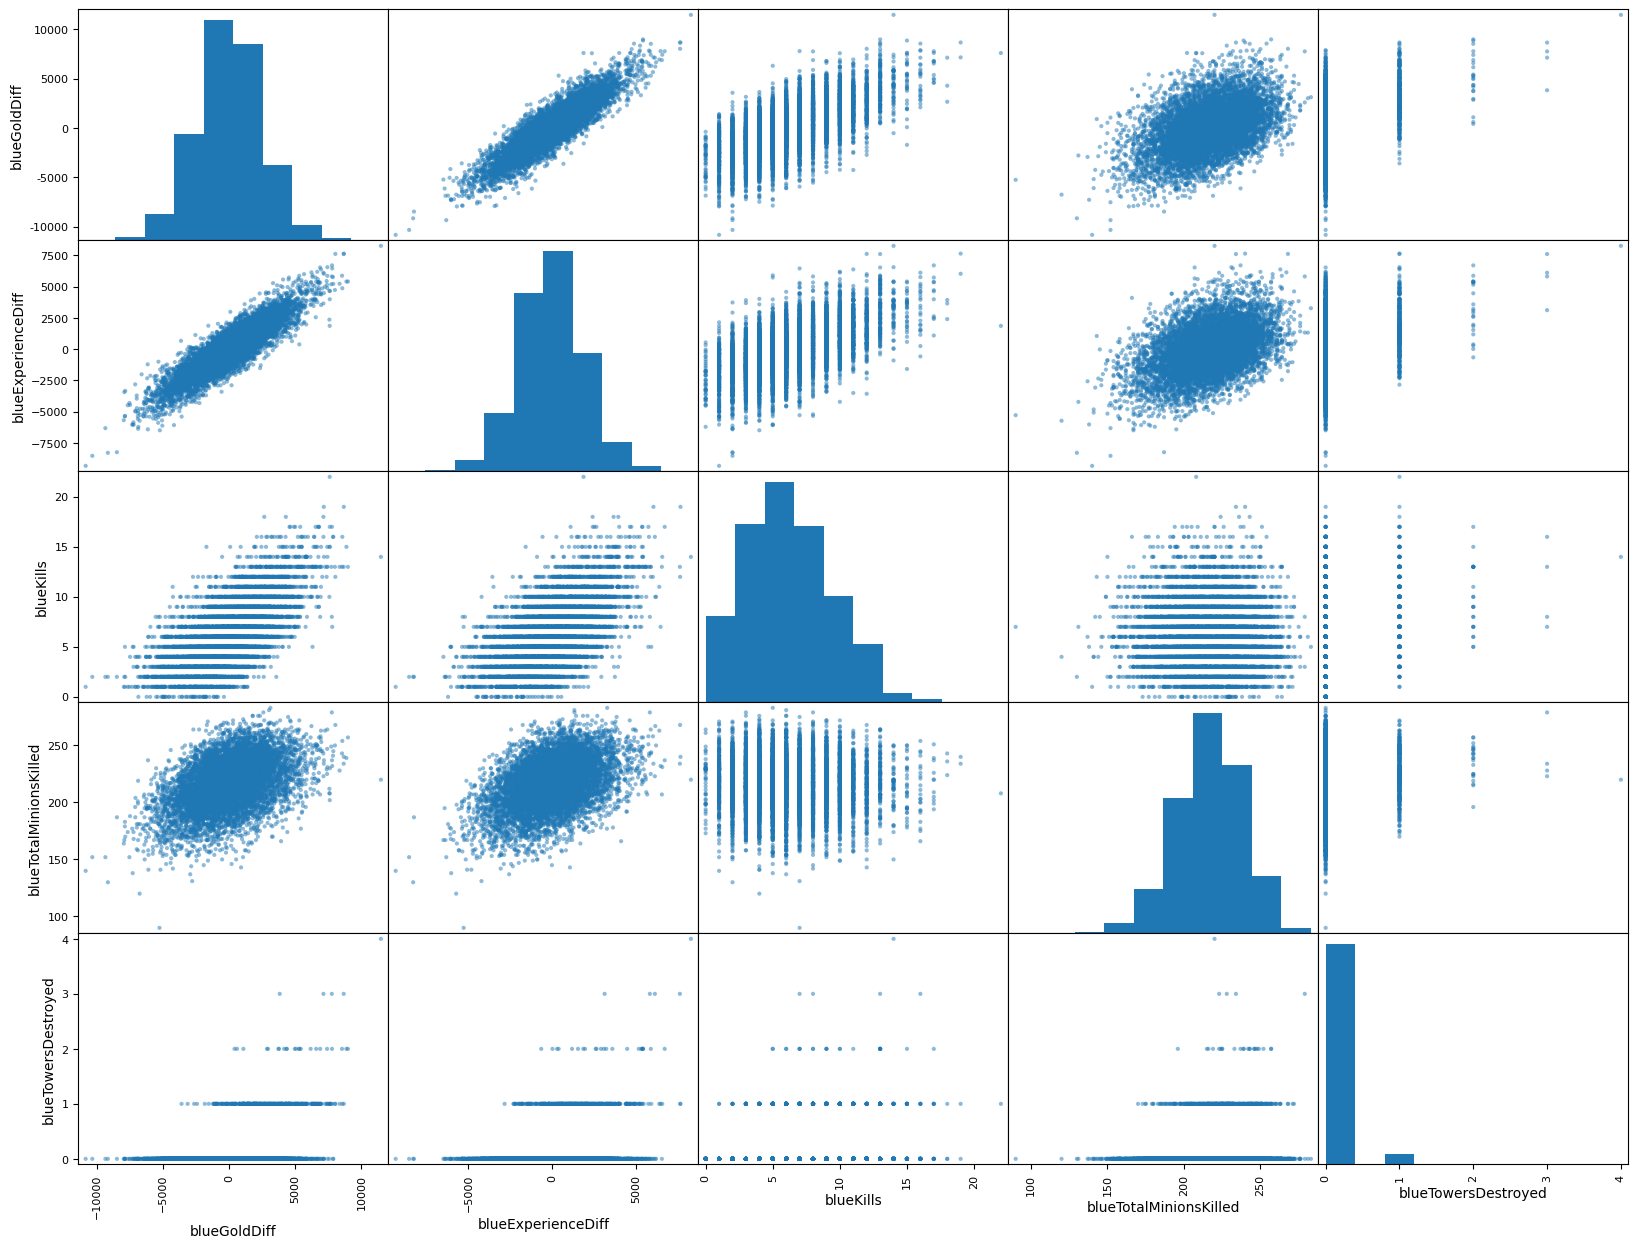

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['blueGoldDiff', 'blueExperienceDiff', 'blueKills', 'blueTotalMinionsKilled', 'blueTowersDestroyed']

scatter_matrix(X_copy[attributes], figsize=(20,15))
plt.show()

From this we can see that kills are the highest contributing factor to gold and experience diffs.

The strong correlation in gold and experience diff is expected, since usually when a team is ahead in either they are also ahead in the other (most things that give gold also give experience) Which tells us we could leave out the expDiff without much change.

Surprising, yet expected (not a lot of turret kills in the first 10 minutes)  turret kills seems to be weaker of the bunch.

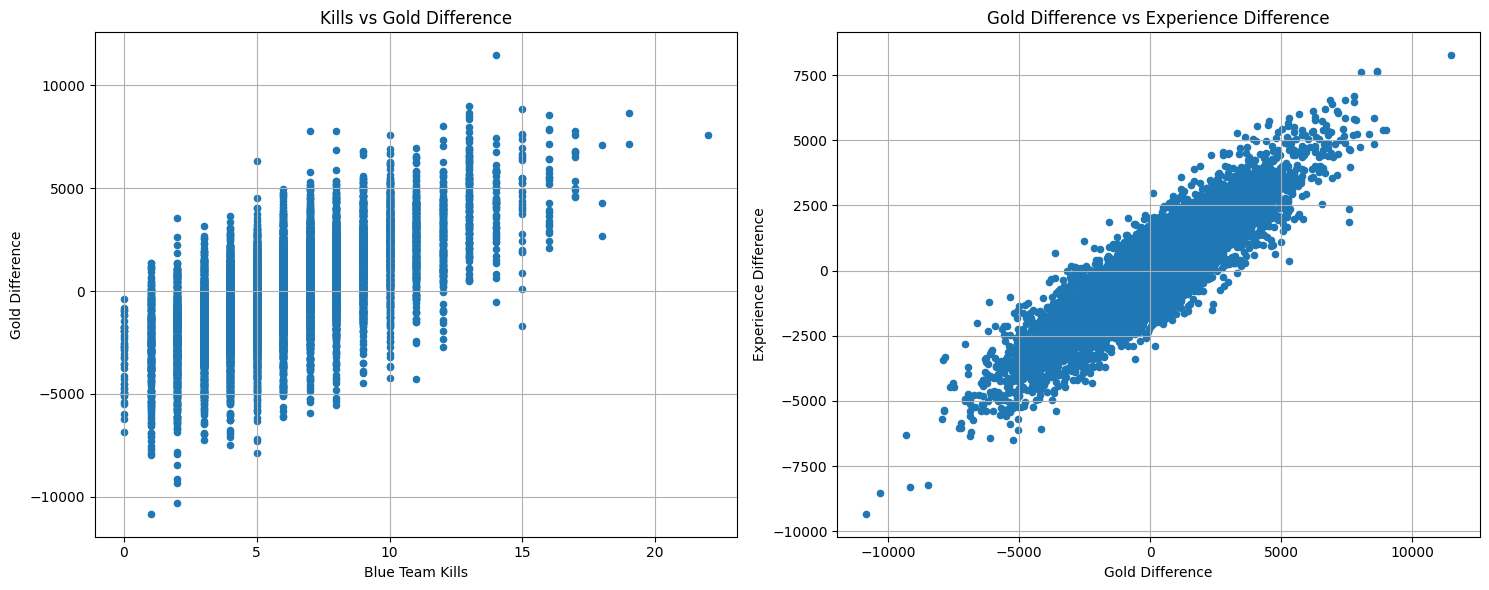

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

X_copy.plot(kind='scatter', x='blueKills', y='blueGoldDiff', ax=axes[0], grid=True)
axes[0].set_title('Kills vs Gold Difference')
axes[0].set_xlabel('Blue Team Kills')
axes[0].set_ylabel('Gold Difference')


X_copy.plot(kind='scatter', x='blueGoldDiff', y='blueExperienceDiff', ax=axes[1], grid=True)
axes[1].set_title('Gold Difference vs Experience Difference')
axes[1].set_xlabel('Gold Difference')
axes[1].set_ylabel('Experience Difference')

plt.tight_layout()
plt.show()

There's a clear upward trend

## Conclusion

We might consider scaling the GoldDiff (and exp if we choose to include it) since it has much larger values than other metrics for distance based algorithms.

Might choose to split the data into with and without exp and train seperately.

Should be sufficient to look at one team only to increase efficiency, we have to be careful not to drop the important ones though.

# Step 4: Prepare the Data

In [ ]:
# Get the target label

X_train = X.drop("blueWins", axis=1)
y_train = X["blueWins"].copy()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

class Dropper(BaseEstimator, TransformerMixin):
    def __init__(self):
      self.cols_to_drop = ['gameId', 'blueGoldPerMin', 'redDeaths', 'blueCSPerMin', 'redFirstBlood', 'redCSPerMin', 'redKills', 'redGoldPerMin', 'redExperienceDiff', 'redGoldDiff']
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        X.drop(columns=self.cols_to_drop, inplace=True)
        return X

preprocessor = make_pipeline(Dropper(), StandardScaler())

Dropping the inverse columns and the stats that contribute less than their 1.0 corellated counterpart (such as GoldPerMin and TotalGold). We decided on the standard scaler to preserve the sign of the Diff attributes, also keeping them zero-centered makes sense based on their possible values. These attributes highly correlated with the winning attribute thus we want to limit the impact of outliers as much as possible.

In [ ]:
X_processed = preprocessor.fit_transform(X_train)

features_after_dropper = [col for col in X_train.columns if col not in Dropper().cols_to_drop]

X_processed = pd.DataFrame(X_processed, columns=features_after_dropper, index=X_train.index)

# Step 5: Shortlist Promising Models

## Quick and dirty with basic params.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("K-NN", KNeighborsClassifier()),
]

# Dictionary to hold the results
model_results = {}

# Loop through the list of models
for name, model in models:

    # Since preprocessing is already done, only the model is needed here
    cv_scores = cross_val_score(model, X_processed, y_train, cv=5, scoring='accuracy')  # 5-Fold CV

    model_results[name] = {
        'Mean': np.mean(cv_scores),
        'Standard Deviation': np.std(cv_scores)
    }

# Print the results
for name, metrics in model_results.items():
    print(f"{name} - Mean: {metrics['Mean']}, Std Dev: {metrics['Standard Deviation']}")

Logistic Regression - Mean: 0.7301029631942609, Std Dev: 0.007687395806151171
Naive Bayes - Mean: 0.7233967445696121, Std Dev: 0.00598088134228686
SVM - Mean: 0.7237760110169017, Std Dev: 0.008428229234031106
Random Forest - Mean: 0.7213726290843001, Std Dev: 0.006600973934198543
Decision Tree - Mean: 0.6321669508963244, Std Dev: 0.007620109889621913
K-NN - Mean: 0.6882198416320388, Std Dev: 0.008680670331195548


### Results on last iteration:

Logistic Regression - Mean: 0.7308622967357624, Std Dev: 0.0062071186214152155

Naive Bayes - Mean: 0.7160581750054044, Std Dev: 0.010400988234572629

SVM - Mean: 0.685563855595321, Std Dev: 0.010308619900276966

Random Forest - Mean: 0.7168171882881368, Std Dev: 0.006347723427780388

Decision Tree - Mean: 0.6362117390851807, Std Dev: 0.00815835296001629

K-NN - Mean: 0.6512734289305759, Std Dev: 0.006547146153651983

We can see that distance based came out worse

We're going to continue with Logistic Regression, Naive Bayes and Random Forest into hyperparameter tuning.

We're going with gridsearch.

# Step 6: Fine-Tune the System

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gs_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
gs_rfc.fit(X_processed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
best_params = gs_rfc.best_params_
best_model = gs_rfc.best_estimator_

feature_importances = best_model.feature_importances_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
best_score = gs_rfc.best_score_
res = gs_rfc.cv_results_

print("Best Score: ", best_score)

Best Score:  0.7298514799958365


The Random Forest accuracy only increased about 1% with hyperparameter tuning, let's look deeper.

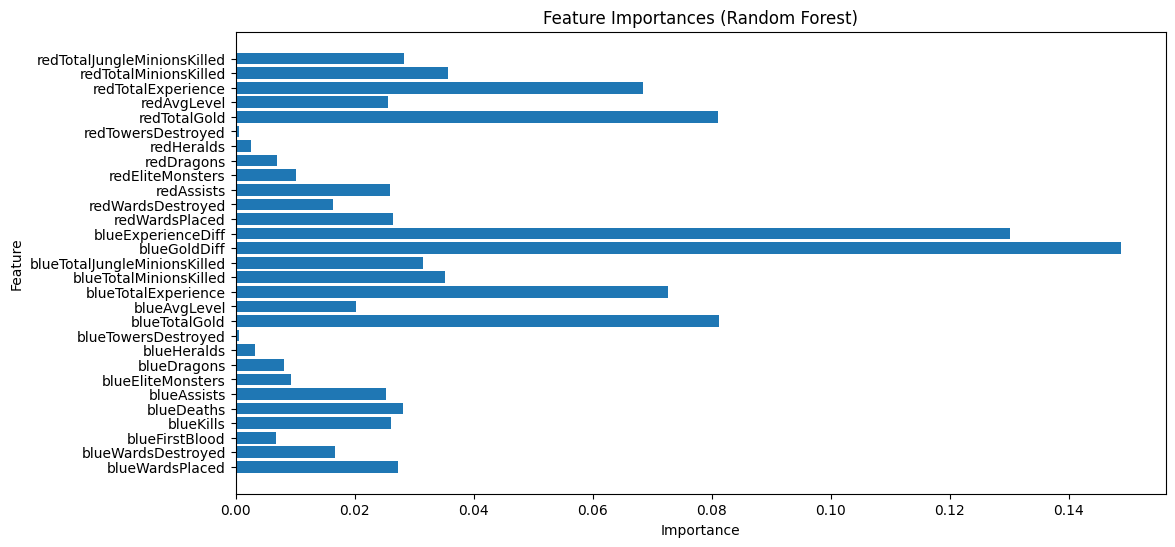

In [ ]:
feature_names_after_preprocessing = X_processed.columns.tolist()

plt.figure(figsize=(12, 6))
plt.barh(feature_names_after_preprocessing, best_model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

As we expected, there's heavy emphasis on the gold and experience, and from our earlier observation that the towers seem to contribute the least to the gold, the model has completely phased it out.

In [ ]:
X_test = y.drop("blueWins", axis=1)
y_test = y["blueWins"].copy()

X_test_processed = preprocessor.fit_transform(X_test)

features_after_dropper = [col for col in X_test.columns if col not in Dropper().cols_to_drop]

X_test_processed = pd.DataFrame(X_test_processed, columns=features_after_dropper, index=X_test.index)

In [ ]:
final_pred = best_model.predict(X_test_processed)

accuracy = accuracy_score(y_test, final_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.722165991902834


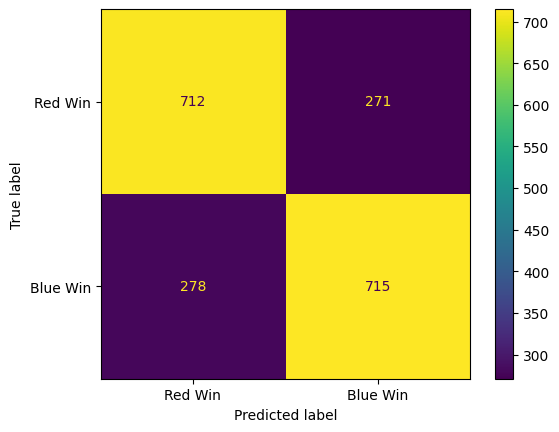

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test_processed)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Red Win', 'Blue Win']).plot()

## Gaussian NB

In [ ]:
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5)
grid_search_gnb.fit(X_processed, y_train)

NB_best_params = grid_search_gnb.best_params_
NB_best_score = grid_search_gnb.best_score_

print(NB_best_params)
print(NB_best_score)

{'var_smoothing': 1e-09}
0.7233967445696121


In [ ]:
final_model = grid_search_gnb.best_estimator_
final_pred = final_model.predict(X_test_processed)
accuracy_gnb = accuracy_score(y_test, final_pred)

print(f"Accuracy: {accuracy_gnb}")

Accuracy: 0.7241902834008097


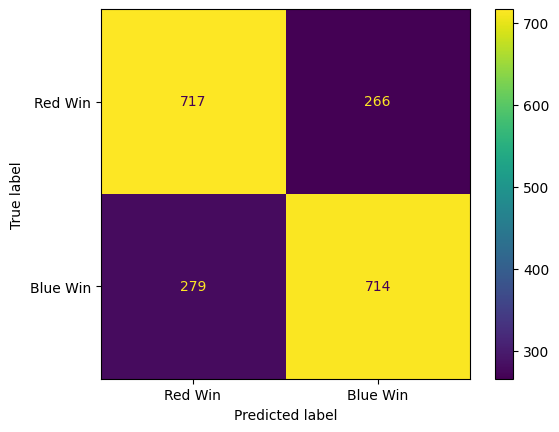

In [ ]:
cm_gnb = confusion_matrix(y_test, final_pred)
ConfusionMatrixDisplay(cm_gnb, display_labels=['Red Win', 'Blue Win']).plot()

## Logistic Regression

In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_search_lr.fit(X_processed, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
LR_best_params = grid_search_lr.best_params_
LR_best_score = grid_search_lr.best_score_

print(LR_best_params)
print(LR_best_score)

final_model_lr = grid_search_lr.best_estimator_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.7335198040016333


In [ ]:

final_pred_lr = final_model_lr.predict(X_test_processed)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, final_pred_lr)

print(f"Accuracy: {accuracy_lr}")

Accuracy: 0.7327935222672065


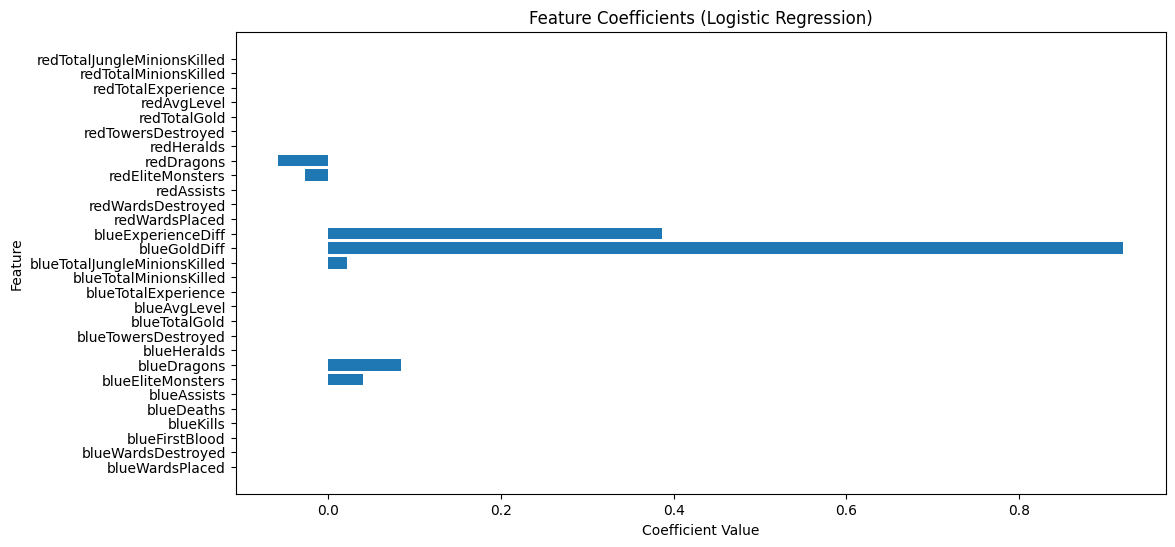

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(feature_names_after_preprocessing, final_model_lr.coef_[0])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients (Logistic Regression)')
plt.show()

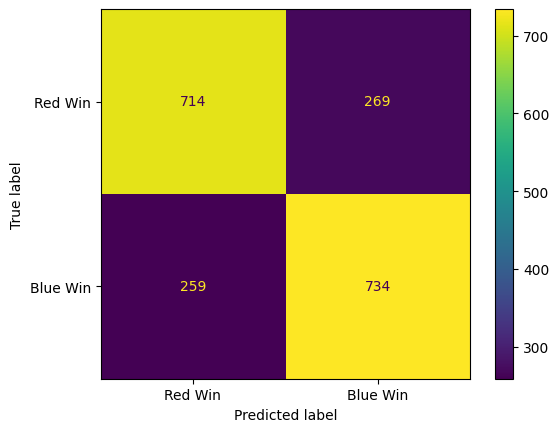

In [ ]:
# Generate the confusion matrix
lr_gnb = confusion_matrix(y_test, final_pred_lr)

# Display the confusion matrix
ConfusionMatrixDisplay(lr_gnb, display_labels=['Red Win', 'Blue Win']).plot()

# Step 7: Present Your Solution

### Conclusions

The model can predict rather successfully the outcome of the game from the first 10 minutes.

In the future it would be interesting to use an updated dataset, it could even provide information if the objects focus has shifted between years. We could also increase the time cutoff to compare to the 15 minutes as mentioned was the forfeit timer. Extra attributes includes champion picks, the players rating and player and champion win rates.

Observations: Distance based models such as kNN were under performing.

Limitations: The model can not account for the external factors of a game such as players mental state and morale.

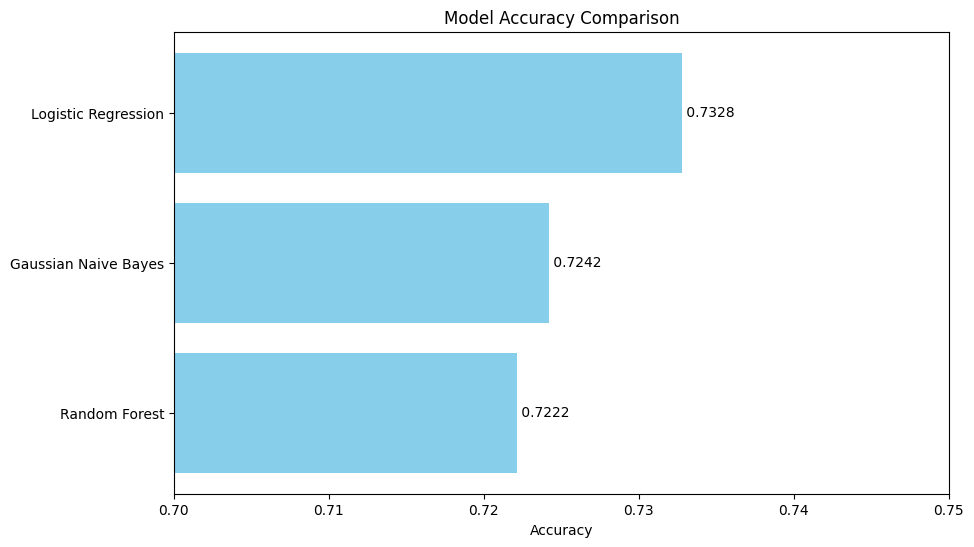

In [ ]:
models = ['Random Forest', 'Gaussian Naive Bayes', 'Logistic Regression']
accuracies = [accuracy, accuracy_gnb, accuracy_lr]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0.7, 0.75)

for i, v in enumerate(accuracies):
    plt.text(v, i, " "+str(round(v, 4)), va='center', color='black')

plt.show()

Project 1 isn't endorsed by Riot Games and doesn't reflect the views or opinions of Riot Games or anyone officially involved in producing or managing Riot Games properties. Riot Games, and all associated properties are trademarks or registered trademarks of Riot Games, Inc.